In [2]:
#import libs
import pandas as pd
import matplotlib
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

ts = pd.read_csv('/home/alessio/Scaricati/Responsetime.csv', header=0, parse_dates=[0], index_col=0)
tsr = ts.resample(rule='30S').mean()
tsr

,"{container=""booking-service"", endpoint=""http-traffic"", instance=""172.17.0.13:8080"", job=""booking-service"", namespace=""default"", pod=""booking-service-7fd5fdfb9f-zwbgk"", service=""booking-service""}"
Time,
2022-01-23 00:00:30,19.40
2022-01-23 00:01:00,17.00
2022-01-23 00:01:30,41.00
2022-01-23 00:02:00,25.50
2022-01-23 00:02:30,30.70
...,...
2022-01-23 09:07:30,4.75
2022-01-23 09:08:00,4.90
2022-01-23 09:08:30,4.67


Time
2022-01-23 00:31:30    7.74376
2022-01-23 00:32:00    7.62960
2022-01-23 00:32:30    7.53656
2022-01-23 00:33:00    7.24760
2022-01-23 00:33:30    7.08696
                        ...   
2022-01-23 08:36:30    4.36712
2022-01-23 08:37:00    4.37304
2022-01-23 08:37:30    4.37120
2022-01-23 08:38:00    4.37528
2022-01-23 08:38:30    4.37912
Freq: 30S, Name: trend, Length: 975, dtype: float64

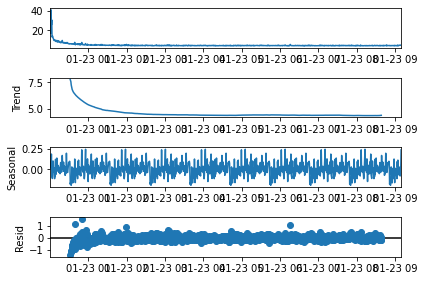

In [3]:
#Work on TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='add', period=125)
result
data = result.trend.dropna()
result.plot()
data

In [4]:
train_data=data.iloc[:877]
test_data=data.iloc[877:]

In [5]:
from pmdarima import auto_arima
auto_arima(data)


ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
model = ARIMA(train_data, order=(5,2,0))

In [7]:
results = model.fit()

In [8]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

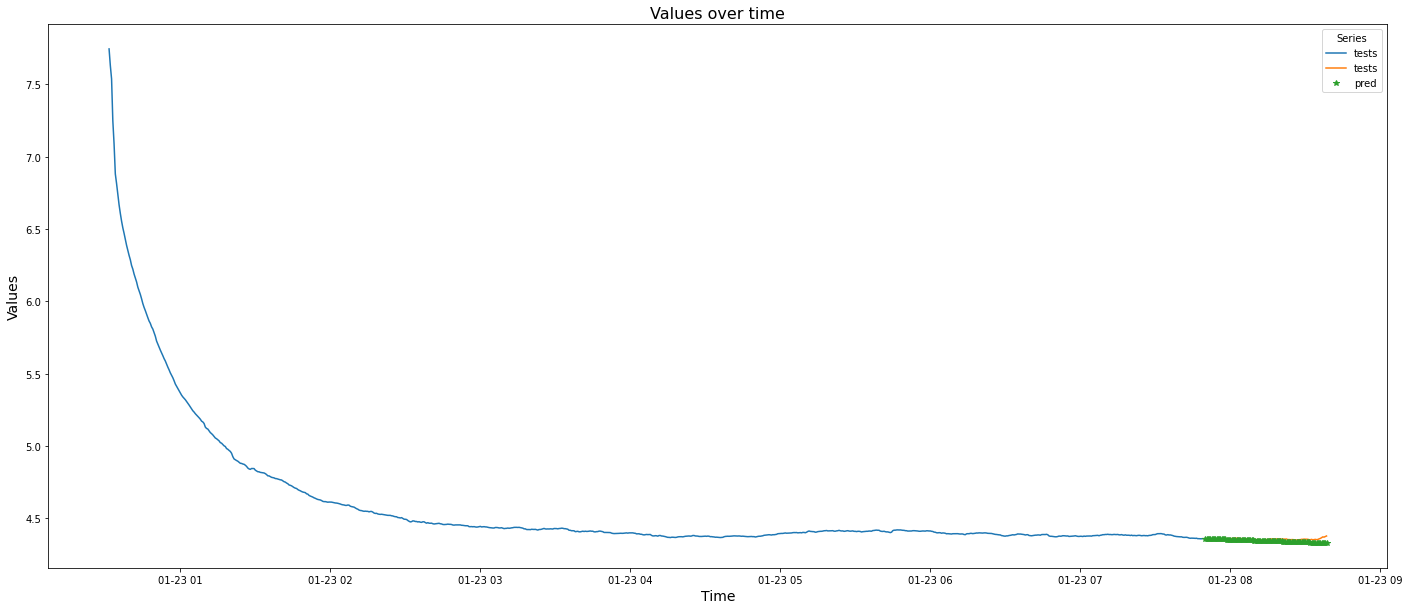

In [9]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(train_data, "-", label = 'tests')
plt.plot(test_data, "-", label = 'tests')
plt.plot(predictions,"*", label='pred')

plt.legend(title='Series')

In [10]:
model = ARIMA(data,order=(5,2,0))
results = model.fit()
fcast = results.predict(len(data),len(data)+45,typ='levels')

/home/alessio/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


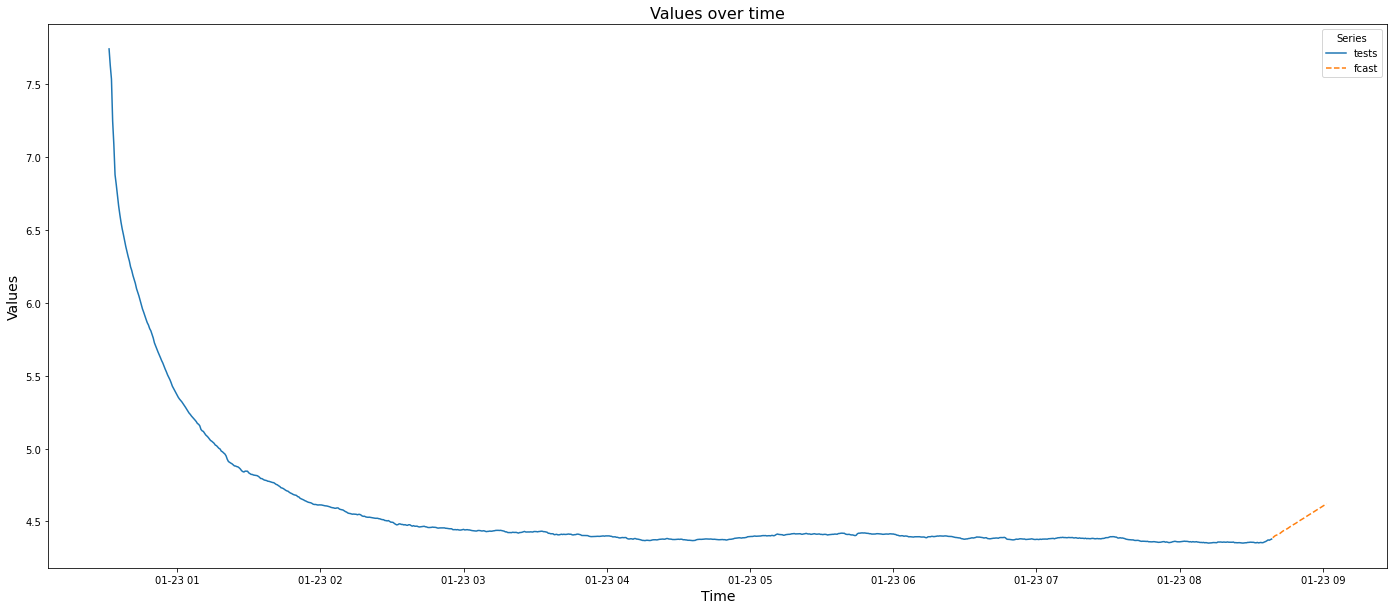

In [11]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(data, "-", label = 'tests')
plt.plot(fcast, "--", label = 'fcast')

plt.legend(title='Series')